In [1]:
import requests
import csv
from datetime import datetime, timedelta

url = "http://www.khoa.go.kr/api/oceangrid/tidalBuAirTemp/search.do"
params = {
    "ServiceKey": "Sfb4fiGk1sy9O8Qfnn4A==",
    "ObsCode": "KG_0028",
    "Date": "",
    "ResultType": "json"
}

start_date = datetime(2013, 1, 1).date()  # Set the starting date
num_days = 3650

# Open the CSV file for writing
with open("dataair.csv", "w", newline="") as file:
    writer = csv.writer(file)

    for i in range(num_days):
        current_date = start_date + timedelta(days=i)
        current_date_str = current_date.strftime("%Y%m%d")
        params["Date"] = current_date_str

        response = requests.get(url, params=params)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            data = response.json()
            # Process the retrieved JSON data as per your requirements
            # You can access the specific data elements using dictionary keys

            # Example: Write data to CSV file
            writer.writerow([current_date_str, data])  # Customize the columns as needed
        else:
            # Handle the error case
            print(f"Error for {current_date_str}:", response.status_code)

In [9]:
import pandas as pd
import numpy as np

# Define the column names
# column_names = ['Column1', 'Column2']

# Read the CSV file and specify the column names
df = pd.read_csv('dataair_02.csv', index_col=0, parse_dates=True)
# df= df.set_index(pd.to_datetime(df.1))
# Display the entire DataFrame
df['평균기온'] = df.mean(axis=1)
df = df[['평균기온']]

df.loc[df['평균기온'] == 0, '평균기온'] = np.nan

df = df.dropna()
df

# # Display the first few rows
# print(df.head())

,평균기온
1,
2013-01-01,-21.305882
2013-01-02,-41.266667
2013-01-03,-4.708000
2013-01-04,-8.456250
2013-01-05,-14.350000
...,...
2022-12-25,6.075510
2022-12-26,6.673469
2022-12-27,6.526531


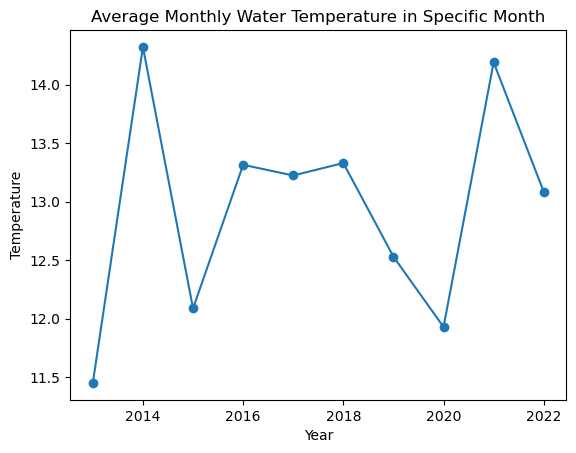

In [18]:
import matplotlib.pyplot as plt
# Define the specific month you want to plot
target_month = 4  # August

# Filter the data for the specific month
specific_month_data = df[df.index.month == target_month]

# Group by year and calculate the average temperature
yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['평균기온'].mean()

# Plot the average monthly water temperature for the specific month
yearly_avg_specific_month.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Monthly Water Temperature in Specific Month')
plt.show()